In [259]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [260]:
df = pd.read_csv('../cleaned_data/cleaned_data.csv')

In [261]:
df

,Unnamed: 0,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
2,3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
3,4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
4,5,3392,6,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78309,99991,34304,8,29.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,...,Bad,3571.70,37.140784,75.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard
78310,99993,37932,2,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,29.135447,376.0,No,35.104023,180.733095,Low_spent_Medium_value_payments,400.104466,Standard
78311,99997,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
78312,99998,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [262]:
df.drop('Unnamed: 0', axis =1, inplace=True )

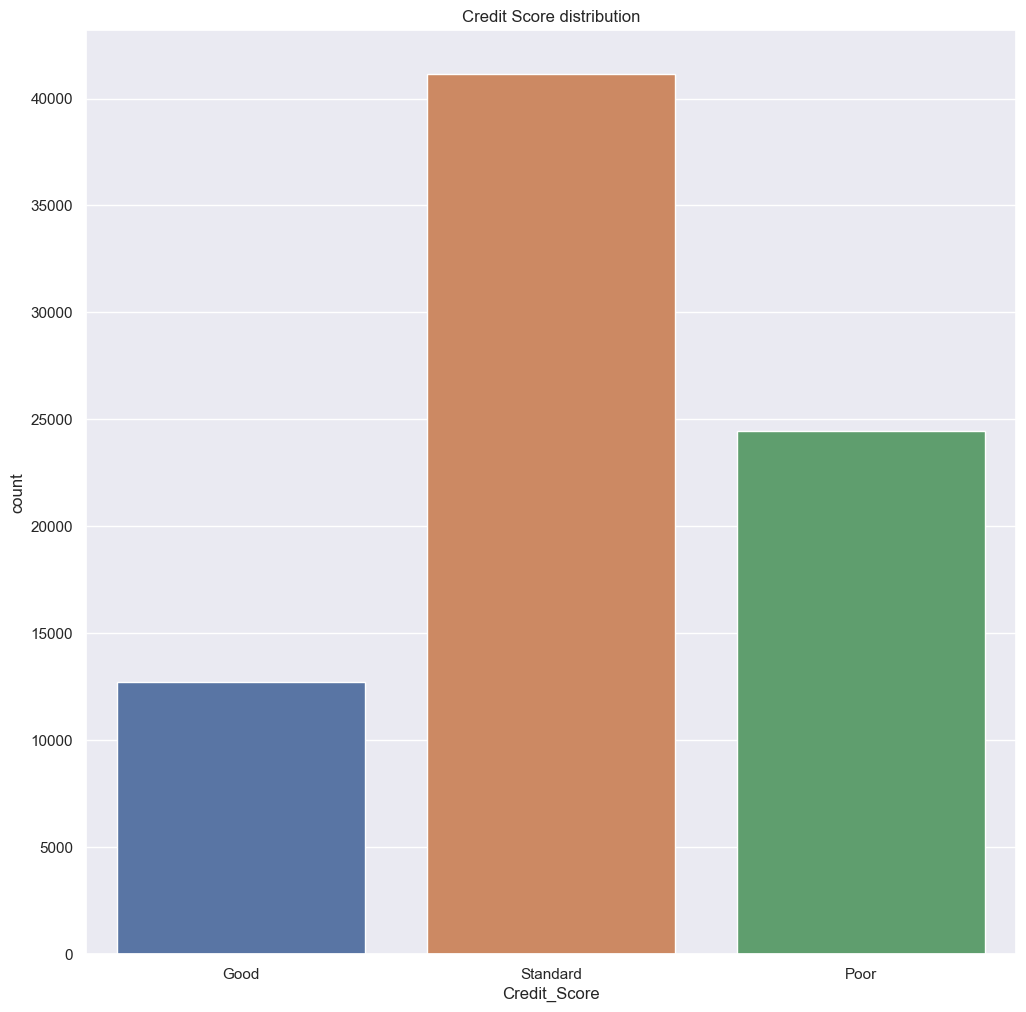

In [263]:
plt.title('Credit Score distribution')
sns.countplot(data=df, x='Credit_Score')
plt.show()

Class Imbalance so Balancing of the classes needs to be done 

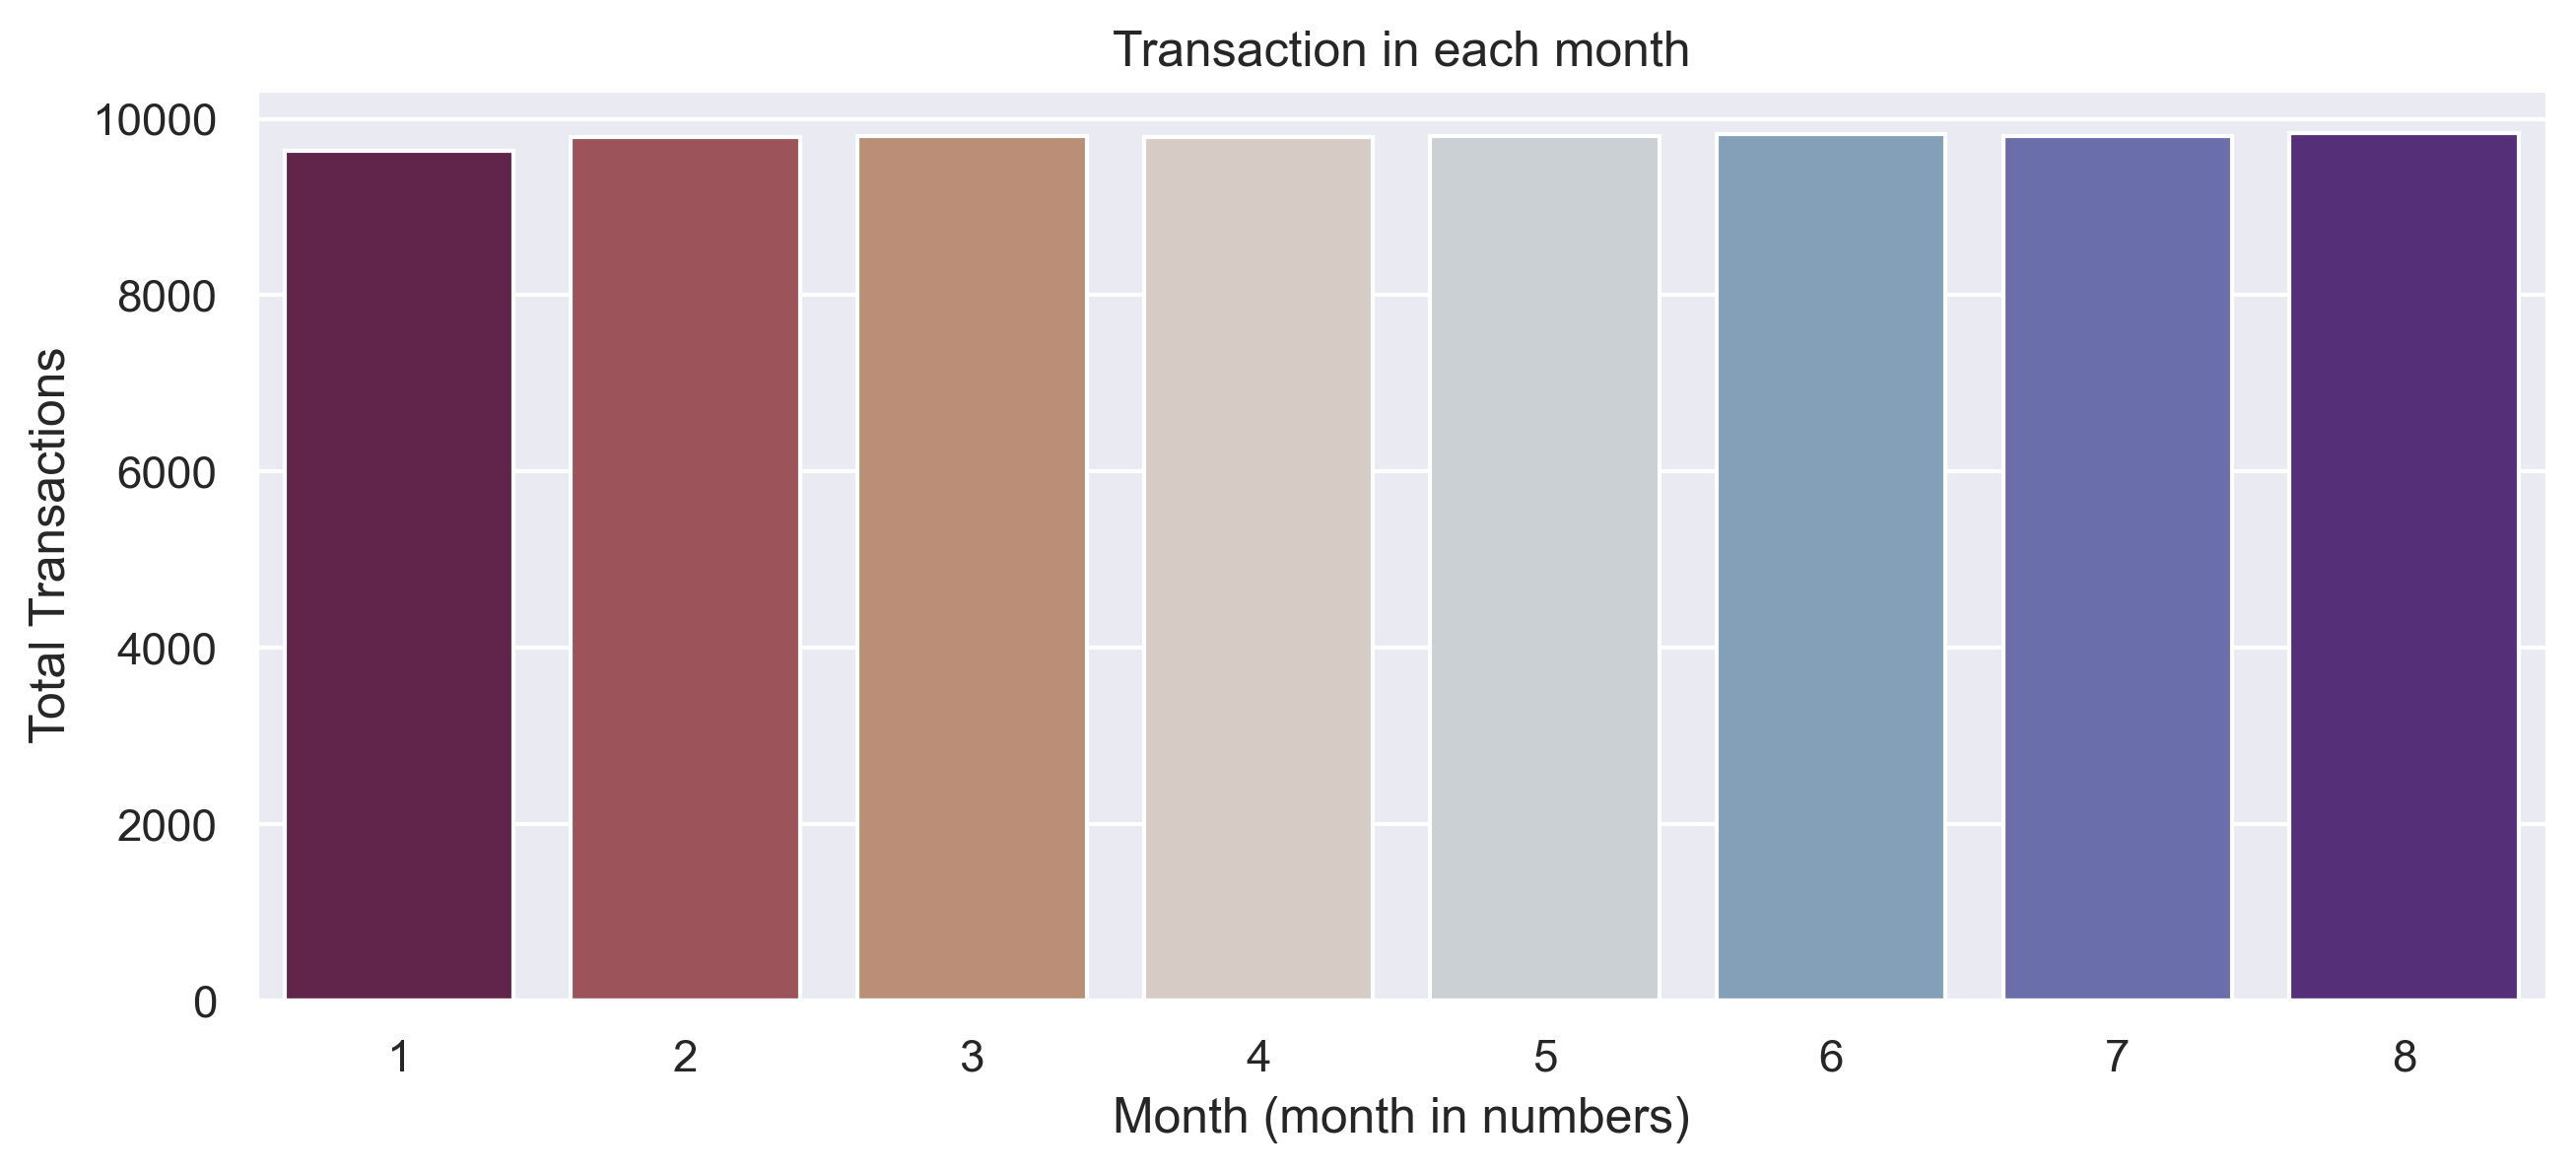

In [264]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Transaction in each month')
sns.countplot(data=df, x='Month', palette='twilight_shifted_r')
plt.xlabel('Month (month in numbers)')
plt.ylabel('Total Transactions')
plt.show()

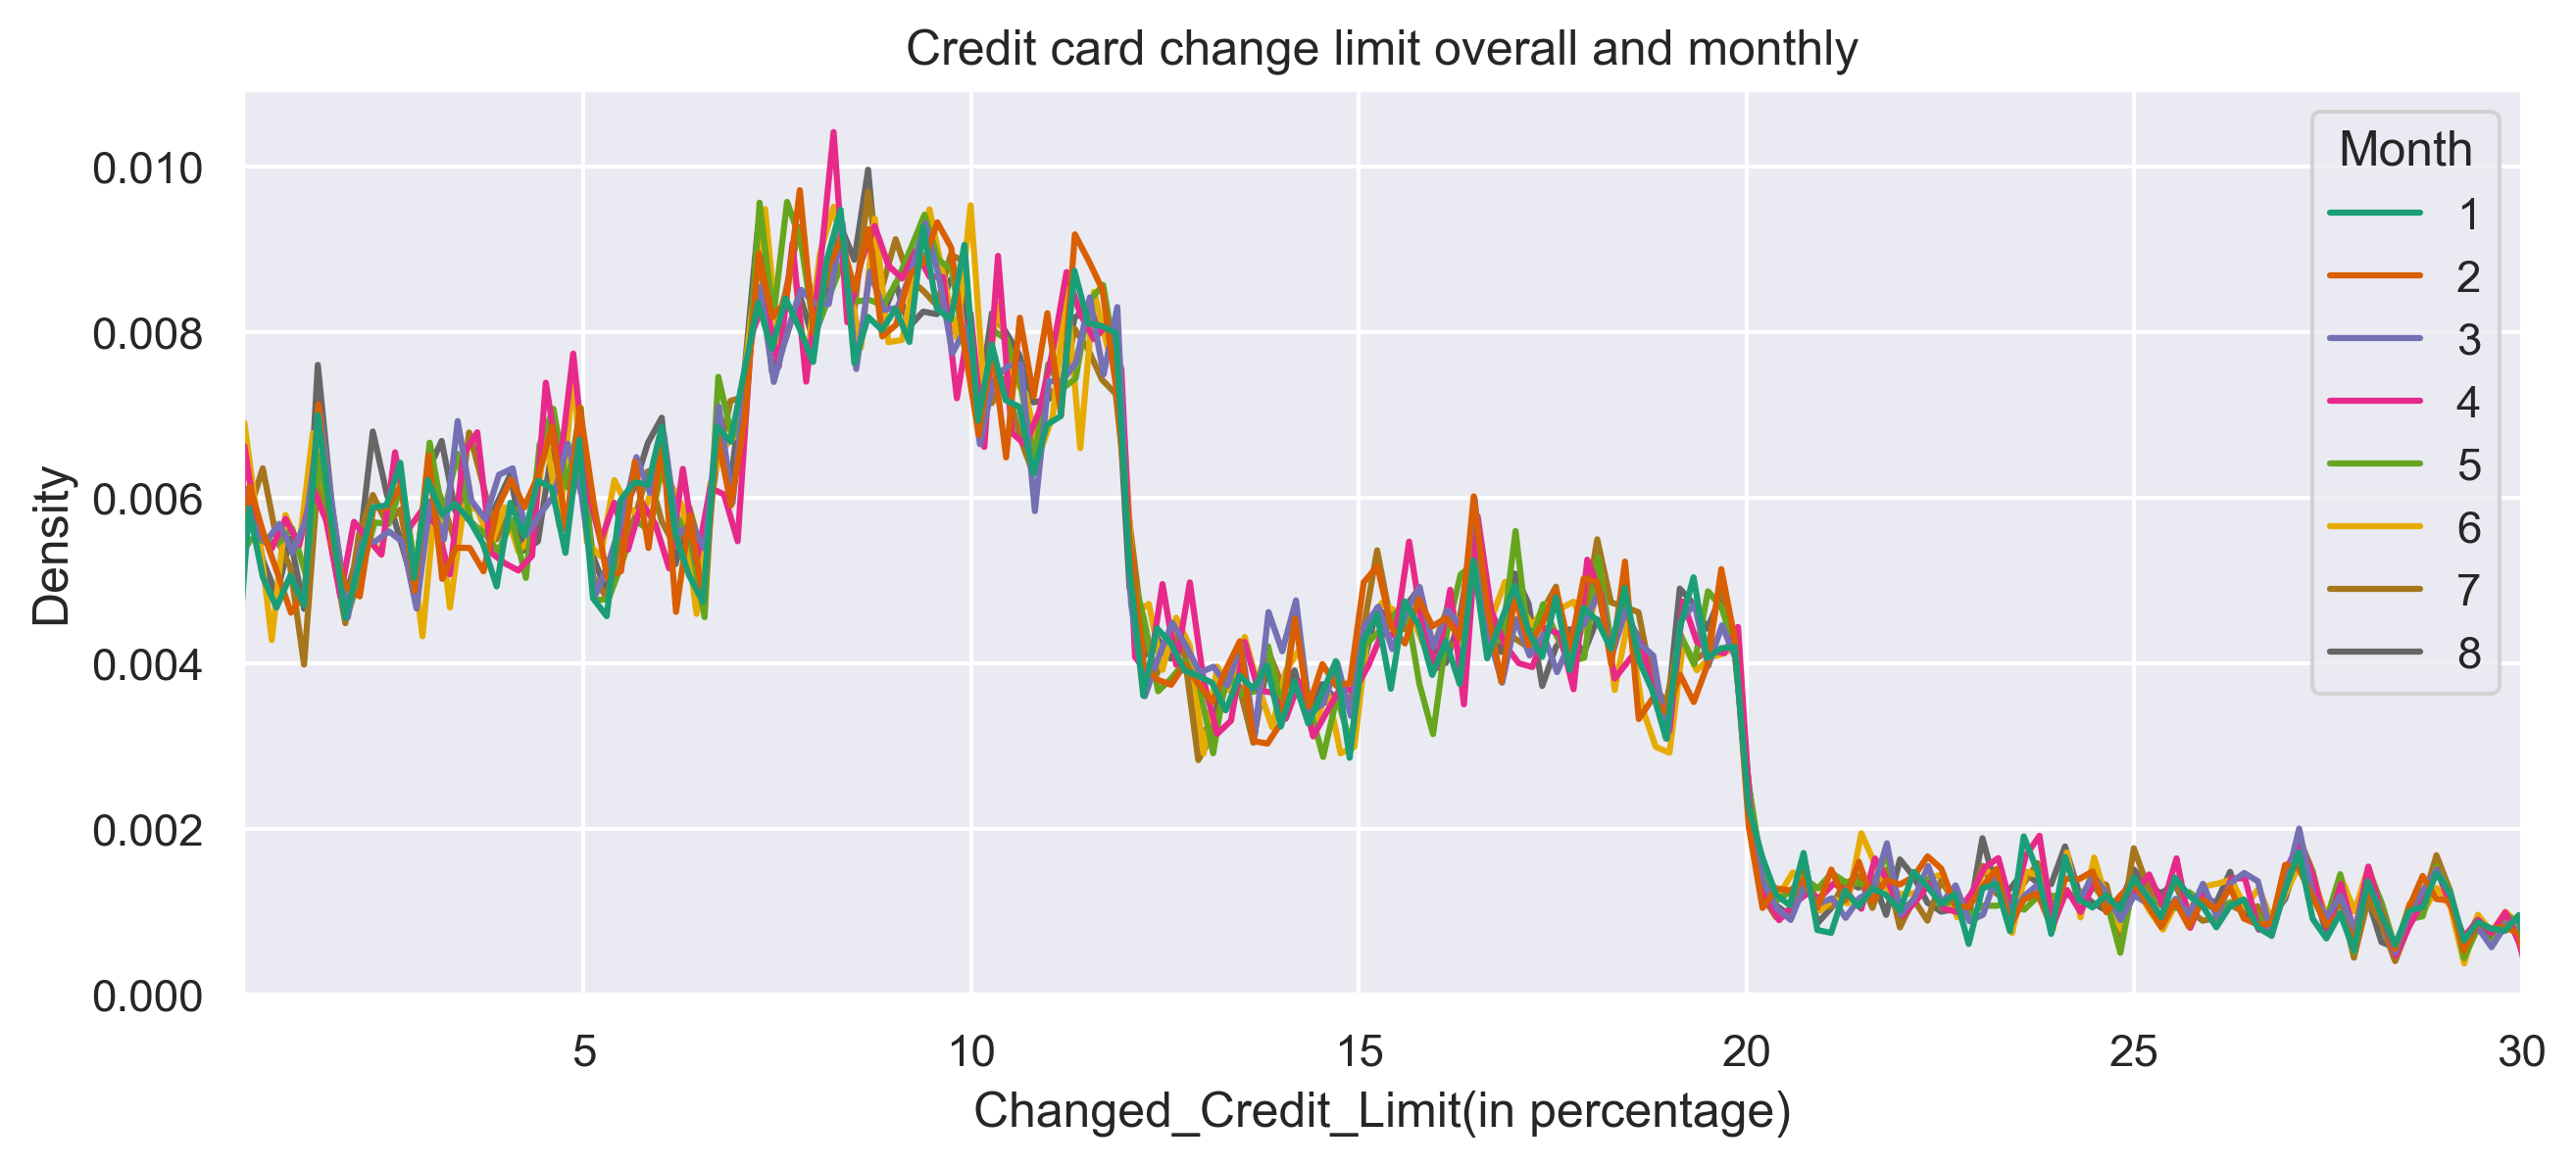

In [265]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Credit card change limit overall and monthly')
plt.xlim(0.6,30)
sns.kdeplot(data=df, x='Changed_Credit_Limit', palette='Dark2', hue='Month', bw_adjust=0.05, legend=True)
plt.xlabel('Changed_Credit_Limit(in percentage)')
plt.show()

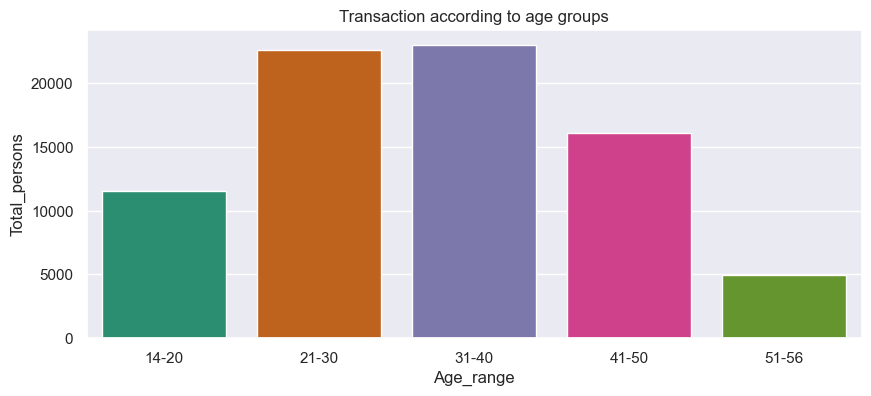

In [266]:
age = {}
x = 0
ages = df.Age.value_counts()
for i in range(14, 57):
    x += ages[i]
    if i == 20:
        age['14-20'] = x
        x = 0
    elif i == 30:
        age['21-30'] = x
        x = 0
    elif i == 40:
        age['31-40'] = x
        x = 0
    elif i == 50:
        age['41-50'] = x
        x = 0
    elif i == 56:
        age['51-56'] = x
age_groups = pd.DataFrame({'Age_range': age.keys(), 'Total_persons': age.values()})
plt.figure(figsize=(10,4), dpi=100)
plt.title('Transaction according to age groups')
sns.barplot(data=age_groups, x='Age_range', y='Total_persons', palette='Dark2')
plt.show()

<Axes: title={'center': 'Bank account distribution for each age agroup'}, xlabel='Age_groups', ylabel='Num_Bank_Accounts'>

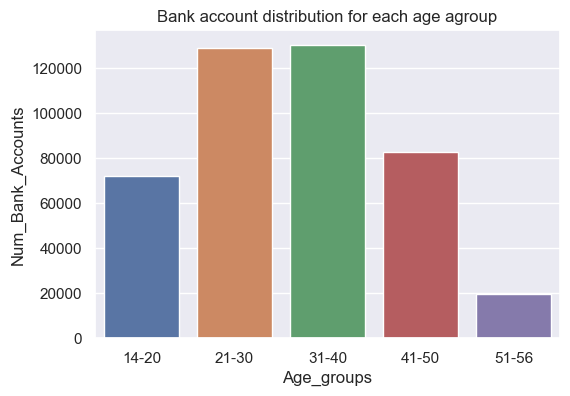

In [267]:
a = df.groupby('Age')['Num_Bank_Accounts'].sum()
x = 0
age_wise_accounts = {}

for i in a.index:
    x += a[i]
    if i == 20:
        age_wise_accounts['14-20'] = x
        x = 0
    elif i == 30:
        age_wise_accounts['21-30'] = x
        x = 0
    elif i == 40:
        age_wise_accounts['31-40'] = x
        x = 0
    elif i == 50:
        age_wise_accounts['41-50'] = x
        x = 0
    elif i == 56:
        age_wise_accounts['51-56'] = x 
account_distribution = pd.DataFrame({'Age_groups': age_wise_accounts.keys(), 'Num_Bank_Accounts': age_wise_accounts.values()})
plt.figure(figsize=(6,4), dpi=100)
plt.title('Bank account distribution for each age agroup')
sns.barplot(data=account_distribution, x='Age_groups', y='Num_Bank_Accounts')

<Axes: xlabel='Credit_Score', ylabel='count'>

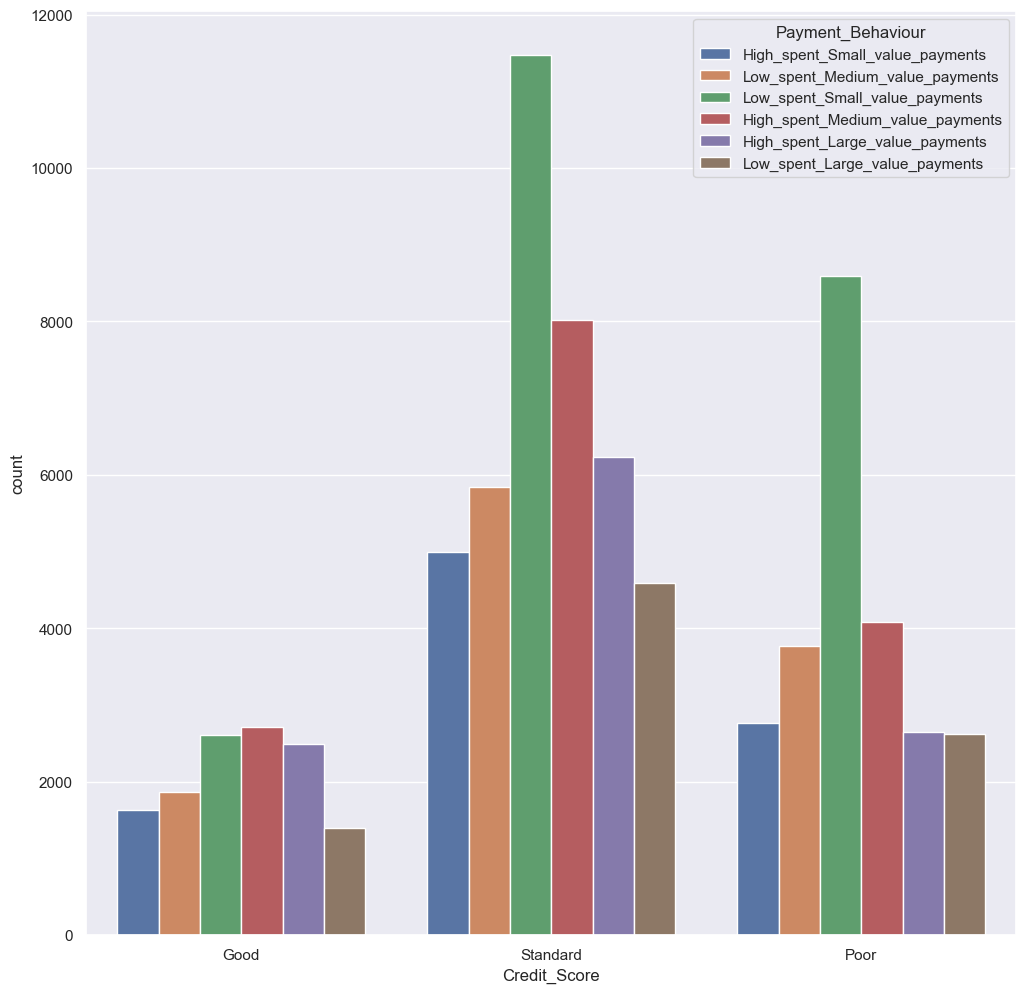

In [268]:
sns.countplot(data=df, x="Credit_Score", hue="Payment_Behaviour")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Scientist'),
  Text(1, 0, 'Teacher'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Entrepreneur'),
  Text(4, 0, 'Lawyer'),
  Text(5, 0, 'Media_Manager'),
  Text(6, 0, 'Doctor'),
  Text(7, 0, 'Journalist'),
  Text(8, 0, 'Manager'),
  Text(9, 0, 'Mechanic'),
  Text(10, 0, 'Writer'),
  Text(11, 0, 'Accountant'),
  Text(12, 0, 'Architect'),
  Text(13, 0, 'Musician'),
  Text(14, 0, 'Developer')])

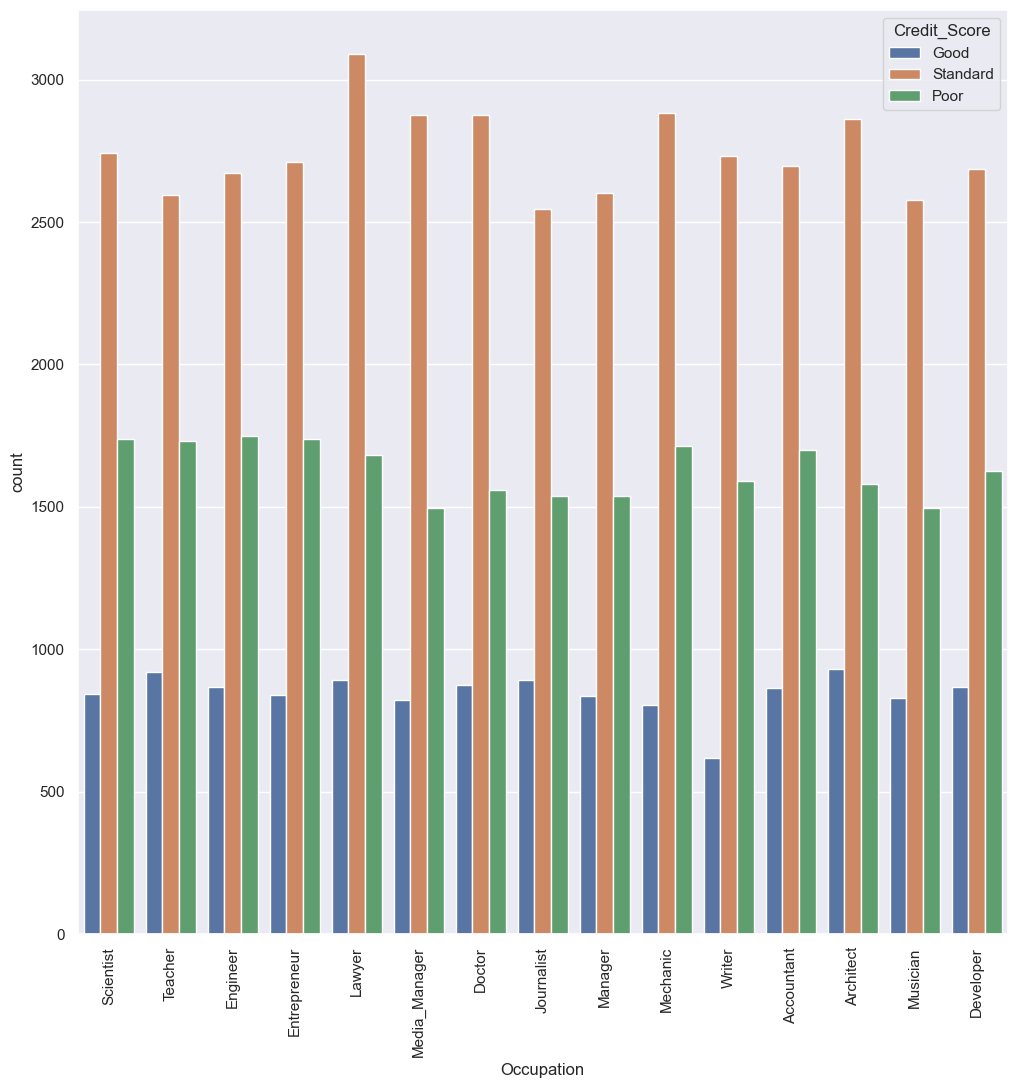

In [269]:
sns.countplot(data=df, x="Occupation", hue="Credit_Score")
plt.xticks (rotation='vertical')

<Axes: xlabel='Credit_Mix', ylabel='count'>

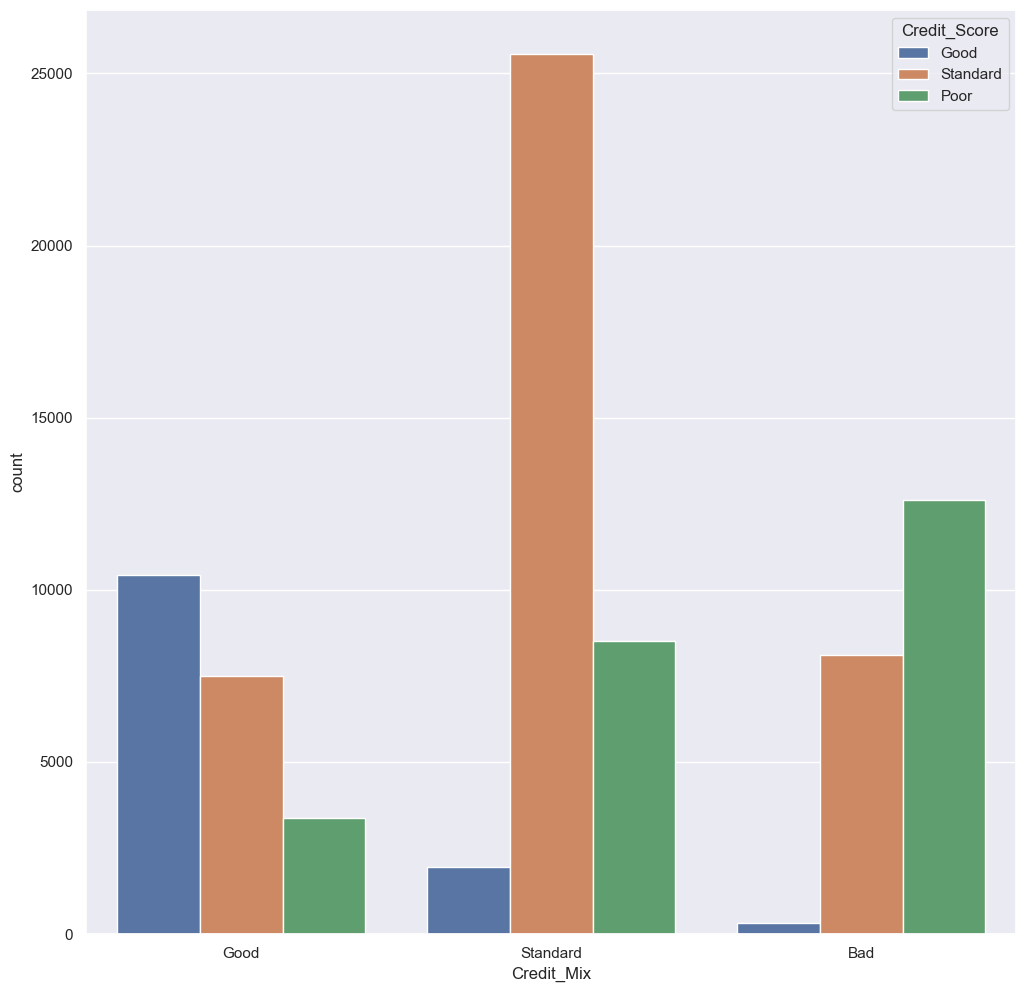

In [270]:
sns.countplot(data=df, x="Credit_Mix", hue="Credit_Score")

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Card'>

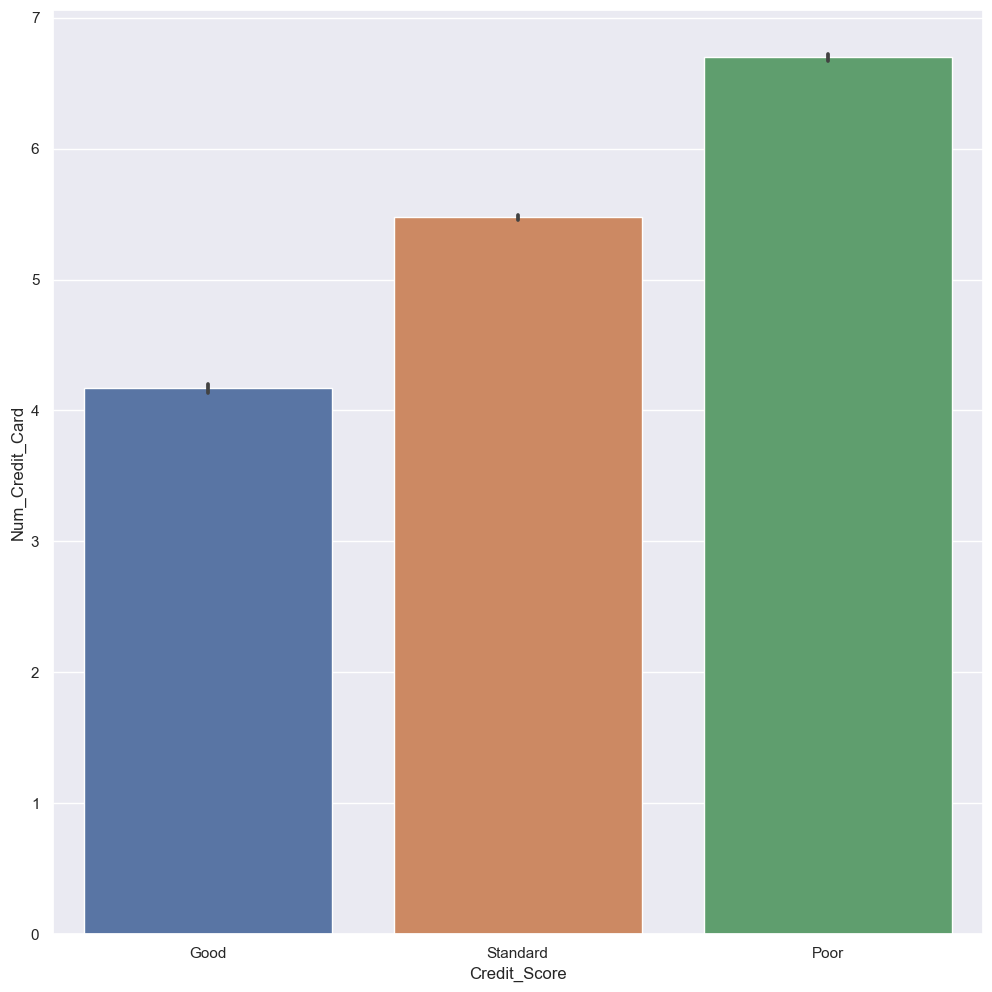

In [271]:
sns.barplot(data=df, x="Credit_Score", y="Num_Credit_Card")

<Axes: xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

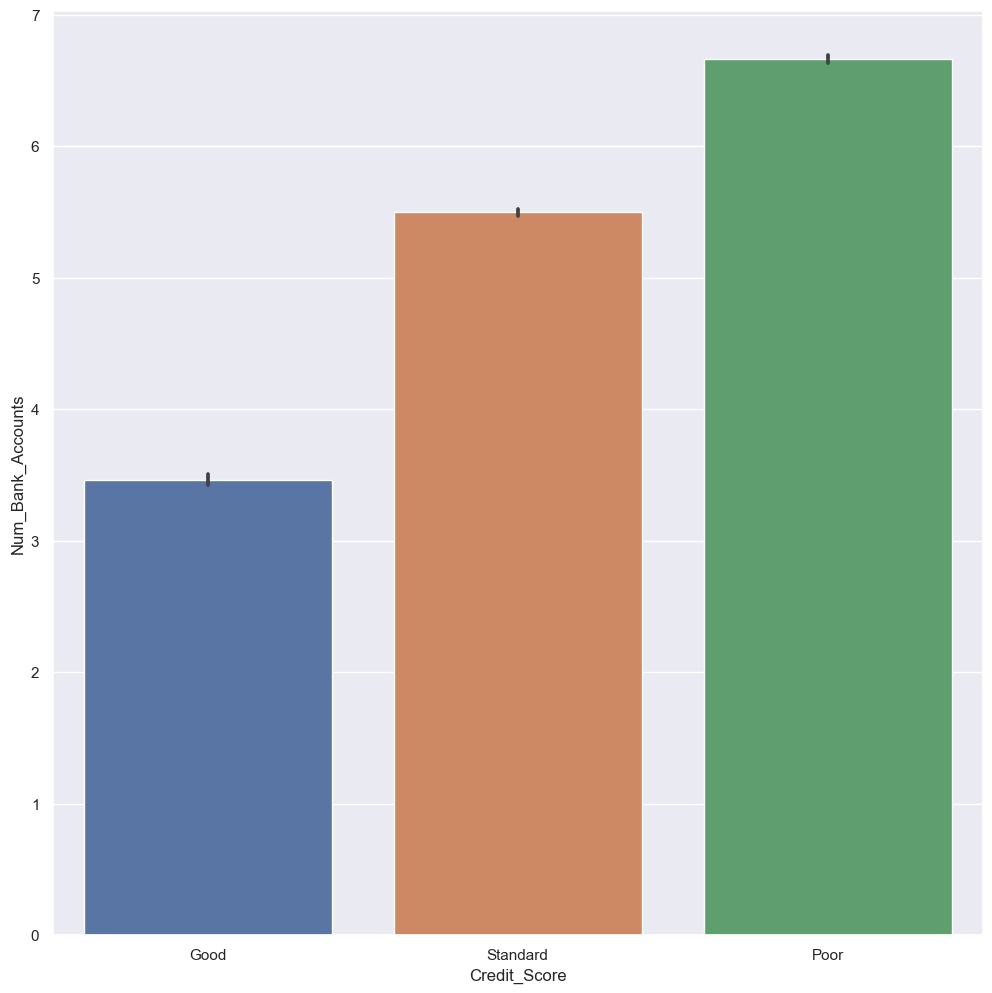

In [272]:
sns.barplot(data=df, x="Credit_Score", y="Num_Bank_Accounts")

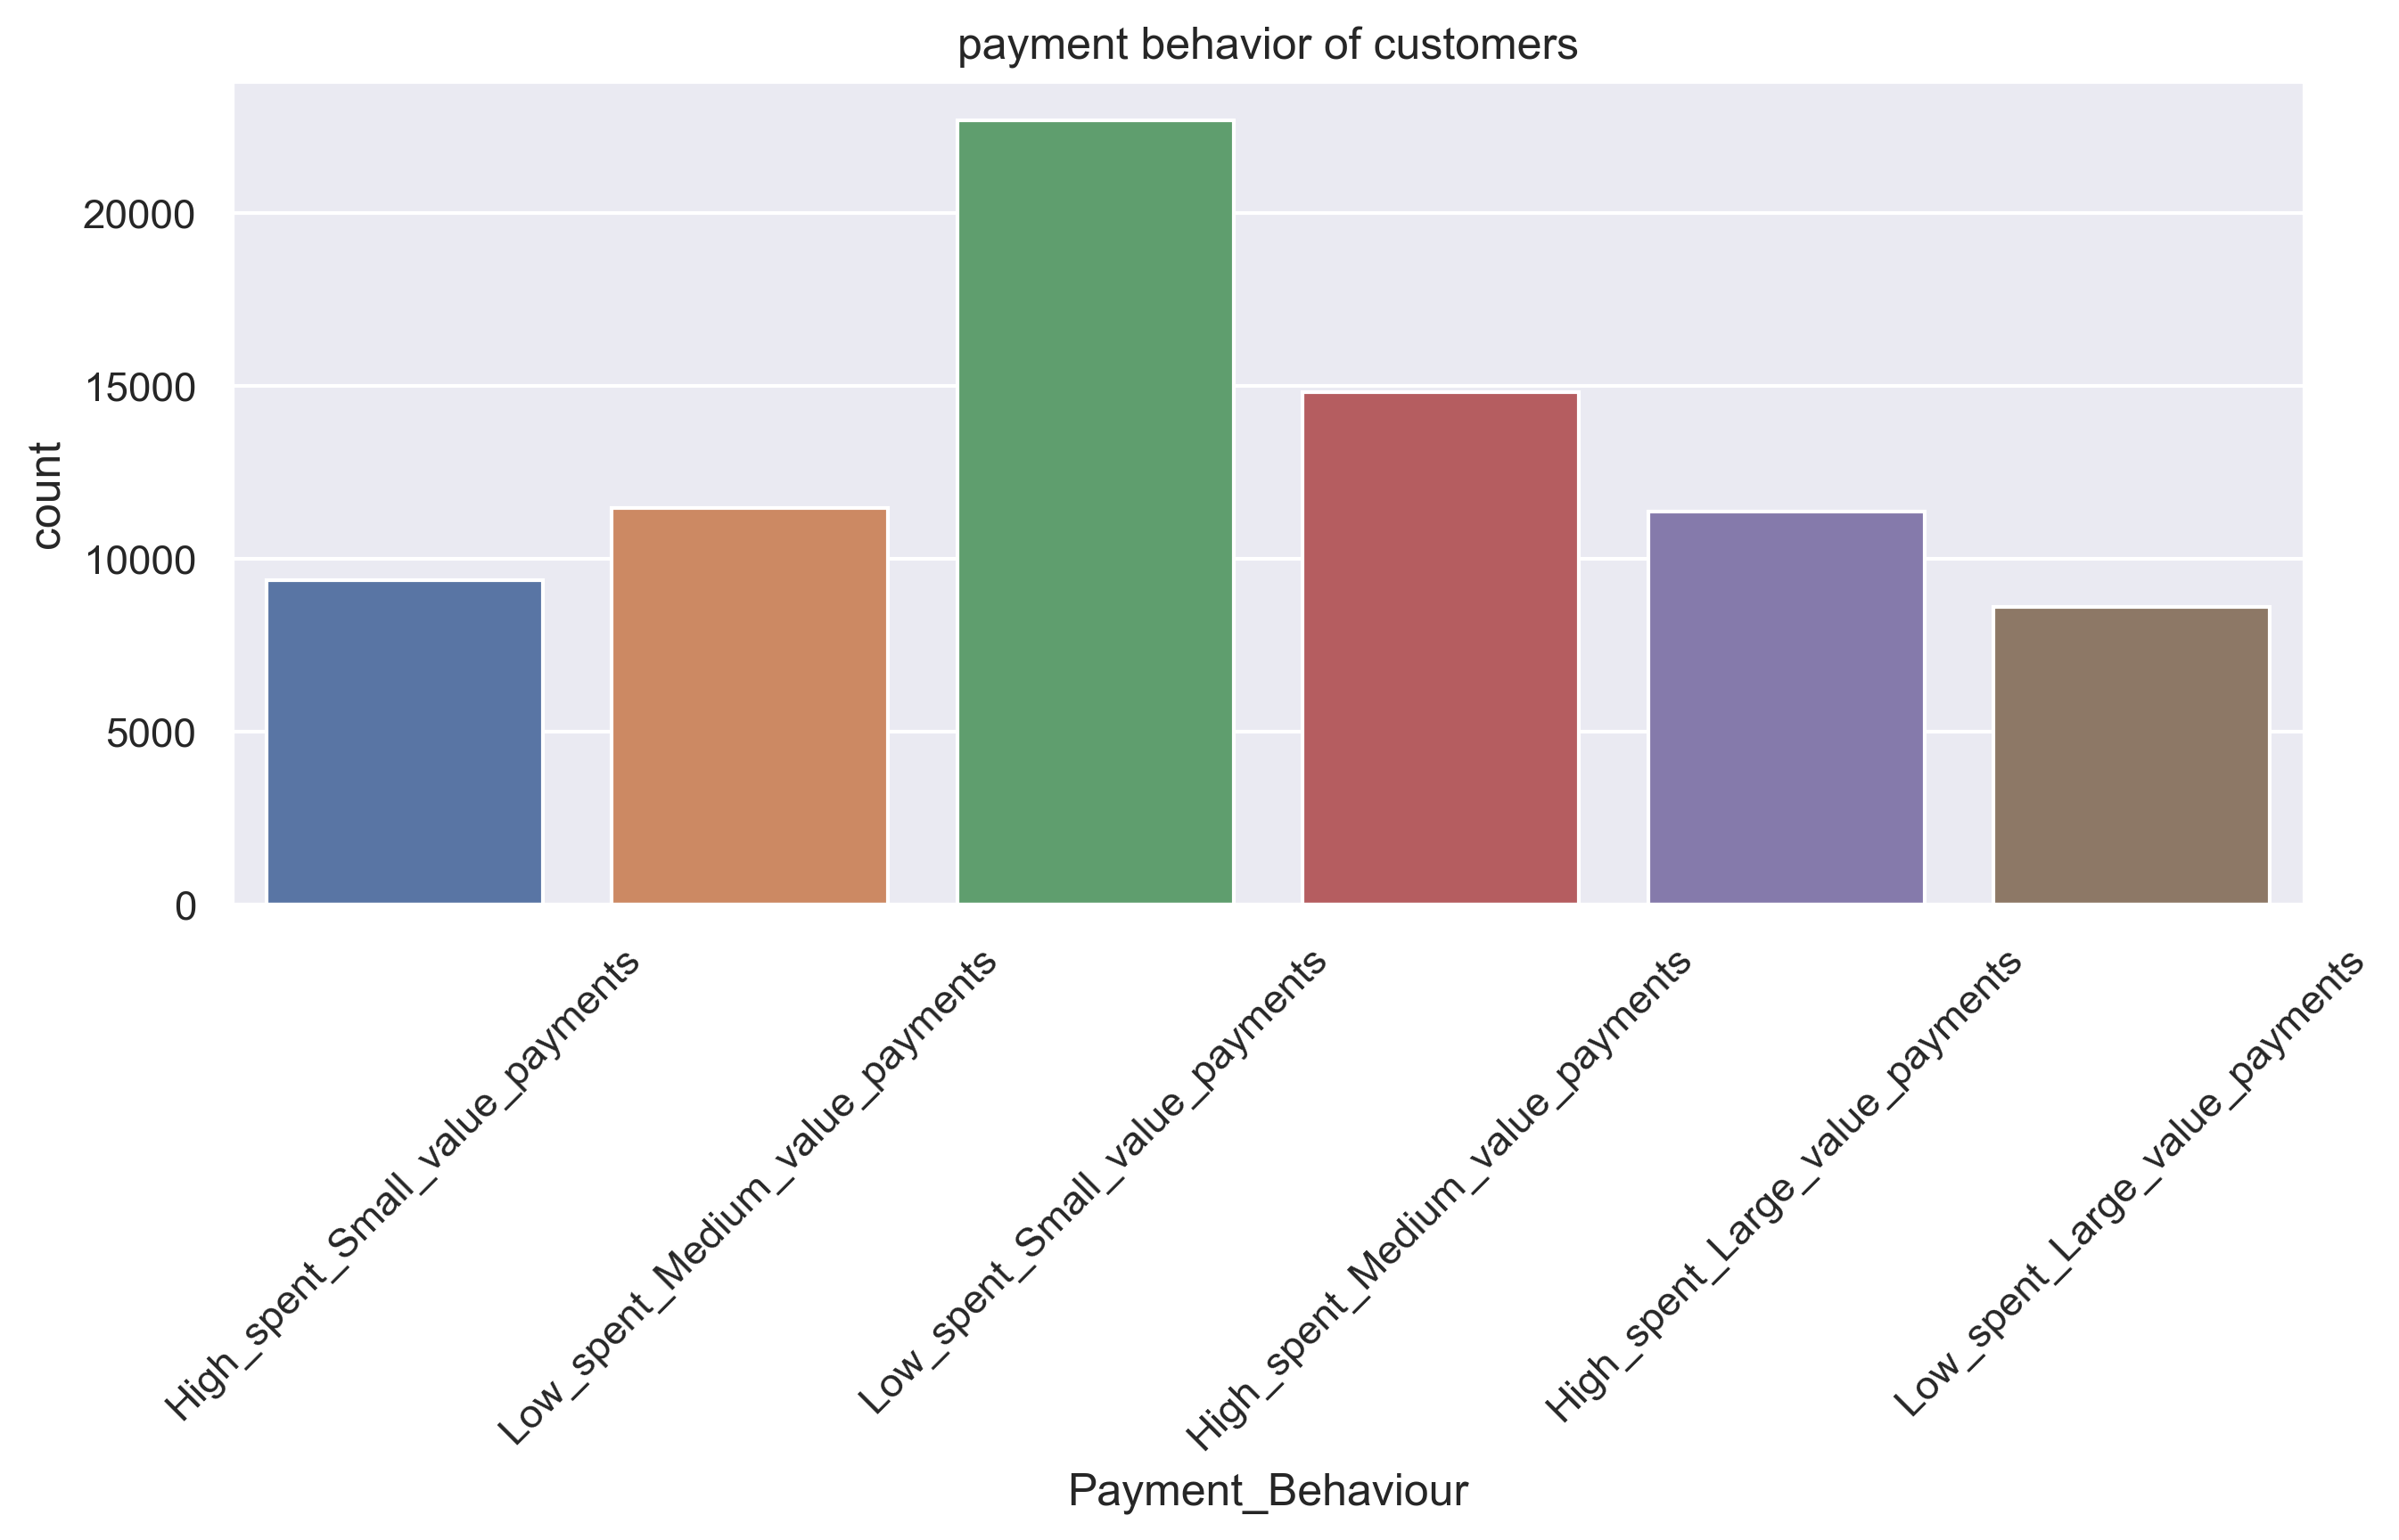

In [273]:
plt.figure(figsize=(10,4), dpi=300)
plt.xticks(rotation=45)
plt.title('payment behavior of customers')
sns.countplot(data=df, x='Payment_Behaviour')
plt.show()

In [274]:
from sklearn.preprocessing import StandardScaler
df_copy = df.copy()
# Initialize the StandardScaler
scaler = StandardScaler()
numerical_columns = df_copy.select_dtypes(include=np.number)

num_vars = numerical_columns.columns.tolist()

df_copy[num_vars] = scaler.fit_transform(df_copy[num_vars])

In [275]:
from sklearn.preprocessing import LabelEncoder

cat_vars = [var for var in df_copy.columns if df_copy[var].dtypes=='O']
df_copy[cat_vars] = df_copy[cat_vars].astype(str).apply(LabelEncoder().fit_transform)
df_copy.head()
# Credit Score 1 -> 

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.578492,-1.533495,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.37677,0.005316,...,1,-0.590592,-1.054430,0.522998,1,-0.540759,-0.267683,2,0.010108,0
1,-1.578492,-0.659654,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.37677,0.005316,...,1,-0.590592,-0.702438,0.542985,1,-0.540759,-0.267056,4,0.010108,0
2,-1.578492,-0.222734,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.37677,0.005316,...,1,-0.590592,-0.157033,0.552979,1,-0.540759,-0.209557,5,0.010108,0
3,-1.578492,0.214187,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.37677,0.005316,...,1,-0.590592,-1.453415,0.562973,1,-0.540759,-0.286724,1,0.010108,0
4,-1.578492,0.651107,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.37677,0.005316,...,1,-0.590592,-0.967820,0.572967,1,-0.540759,-0.276465,5,0.010108,0


In [276]:
df_copy.columns


Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [277]:
df_copy.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.578492,-1.533495,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-1.054430,0.522998,1,-0.540759,-0.267683,2,0.010108,0
1,-1.578492,-0.659654,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-0.702438,0.542985,1,-0.540759,-0.267056,4,0.010108,0
2,-1.578492,-0.222734,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-0.157033,0.552979,1,-0.540759,-0.209557,5,0.010108,0
3,-1.578492,0.214187,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-1.453415,0.562973,1,-0.540759,-0.286724,1,0.010108,0
4,-1.578492,0.651107,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-0.967820,0.572967,1,-0.540759,-0.276465,5,0.010108,0
5,-1.578492,1.088027,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-1.898594,0.582960,1,-0.540759,-0.219866,5,0.010108,0
6,-1.213363,-1.533495,-0.462937,13,-0.376476,-0.331017,-1.366186,-0.787182,-1.039065,-1.344789,...,1,-0.762545,-1.519080,1.062664,1,-0.780538,-0.256025,5,0.010108,2
7,-1.213363,-1.096574,-0.462937,13,-0.376476,-0.331017,-1.366186,-0.787182,-1.039065,-1.344789,...,1,-0.762545,1.256068,1.072657,1,-0.780538,-0.287226,0,0.010108,0
8,-1.213363,-0.659654,-0.462937,13,-0.376476,-0.331017,-1.366186,-0.787182,-1.039065,-1.344789,...,1,-0.762545,0.206849,1.082651,1,-0.780538,-0.278376,0,0.010108,2
9,-1.213363,-0.222734,-0.462937,13,-0.376476,-0.331017,-1.366186,-0.787182,-1.039065,-1.344789,...,1,-0.762545,1.380536,1.092645,1,-0.780538,-0.258459,4,0.010108,0


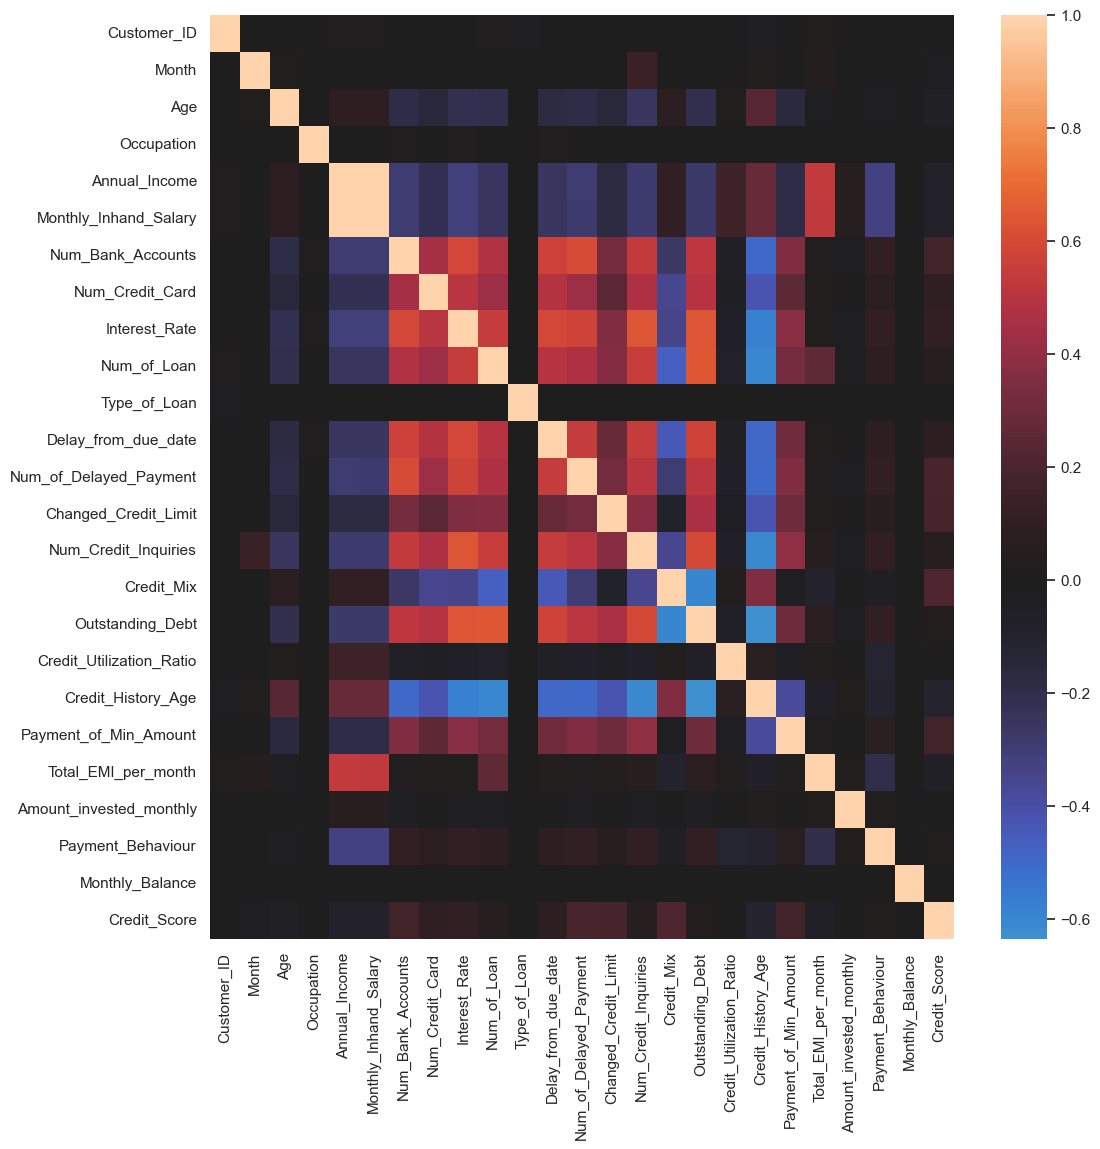

In [278]:
corr = df_copy.corr()
sns.heatmap(corr, center=0 )
# set the figure size
sns.set(rc={'figure.figsize':(12,12)})

plt.show()

In [279]:
# Before the data is used for the machine learning models it needs to be resampled and then applied to the machine learning model 

Credit Score in categorical Variable
- 1 Poor
- 0 - Good 
- 2 - Standard 

In [280]:
df_copy

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-1.578492,-1.533495,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-1.054430,0.522998,1,-0.540759,-0.267683,2,0.010108,0
1,-1.578492,-0.659654,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-0.702438,0.542985,1,-0.540759,-0.267056,4,0.010108,0
2,-1.578492,-0.222734,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-0.157033,0.552979,1,-0.540759,-0.209557,5,0.010108,0
3,-1.578492,0.214187,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-1.453415,0.562973,1,-0.540759,-0.286724,1,0.010108,0
4,-1.578492,0.651107,-0.932368,12,-0.796143,-0.719649,-0.979334,-0.787182,-1.376770,0.005316,...,1,-0.590592,-0.967820,0.572967,1,-0.540759,-0.276465,5,0.010108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78309,0.578373,1.524948,-0.369051,1,-0.772437,-0.685992,1.728625,1.126397,1.550005,0.455350,...,0,1.726500,0.978280,-1.375827,2,-0.451970,-0.290023,0,0.010108,2
78310,0.831515,-1.096574,-0.744596,9,-0.248947,-0.228046,-0.592483,0.169607,-0.926497,-0.894754,...,1,-0.848669,-0.598796,1.632311,1,-0.653567,-0.218700,4,0.010108,2
78311,0.831515,0.651107,-0.744596,9,-0.248947,-0.228046,-0.592483,0.169607,-0.926497,-0.894754,...,1,-0.848669,1.788897,1.672286,1,-0.653567,-0.295216,0,0.010108,1
78312,0.831515,1.088027,-0.744596,9,-0.248947,-0.228046,-0.592483,0.169607,-0.926497,-0.894754,...,1,-0.848669,0.288262,1.682280,1,-0.653567,-0.184061,3,0.010108,2


In [281]:
df_copy.drop('Monthly_Inhand_Salary', axis = 1, inplace =True)

In [282]:
df_copy.drop('Customer_ID', axis = 1, inplace =True)

In [283]:
df_copy.to_csv("../cleaned_data/final_df.csv")

Here we have two columns which are highly correlated with each other . So the thing is to which column to remove. it may be more appropriate to keep Annual_Income as it's a more stable and long-term indicator of a person's financial situation. On the other hand, if the goal is to predict short-term spending behavior, it may be more appropriate to keep Monthly_Inhand_Salary.